<a href="https://colab.research.google.com/github/PacktPublishing/Machine-Learning-for-Time-Series-with-Python/blob/master/chapter7/Kats.ipynb" target="_parent\"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!MINIMAL=1 pip install kats

     |████████████████████████████████| 6.3 MB 2.5 MB/s eta 0:00:01
     |████████████████████████████████| 60 kB 12.2 MB/s eta 0:00:01
     |████████████████████████████████| 934 kB 38.0 MB/s eta 0:00:01
     |████████████████████████████████| 64 kB 4.1 MB/s  eta 0:00:01
     |████████████████████████████████| 310 kB 32.2 MB/s eta 0:00:01
     |████████████████████████████████| 37.4 MB 2.8 MB/s eta 0:00:011��███████████▋                  | 15.9 MB 17.4 MB/s eta 0:00:02
     |████████████████████████████████| 325 kB 32.6 MB/s eta 0:00:01
  Created wheel for kats: filename=kats-0.1.0-py3-none-any.whl size=286600 sha256=4dea6fc9a4a63580d041ac846c851bfd890f4a65b5ee86c795f0023499ece14e
  Stored in directory: /Users/sharanh/Library/Caches/pip/wheels/f9/3e/4a/7f382a87477e6ea297d55b0f55d0837d297f6add0382c9a99a
  ERROR: Command errored out with exit status 1:
   command: /Users/sharanh/opt/anaconda3/bin/python -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/n3/

In [3]:
!pip install "numpy==1.20"

  Using cached numpy-1.20.0-cp38-cp38-macosx_10_9_x86_64.whl (16.0 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.1
    Uninstalling numpy-1.20.1:
      Successfully uninstalled numpy-1.20.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sktime 0.10.0 requires numpy<1.22,>=1.21.0, but you have numpy 1.20.0 which is incompatible.
greykite 0.3.0 requires pandas<1.3,>=1.1.3, but you have pandas 1.3.5 which is incompatible.
featuretools 1.4.1 requires numpy>=1.21.0, but you have numpy 1.20.0 which is incompatible.
featuretools-tsfresh-primitives 1.0.2 requires tsfresh>=0.19.0, but you have tsfresh 0.18.0 which is incompatible.


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('seaborn-whitegrid')
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = "17"

In [5]:
import pandas as pd

owid_covid = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv")
owid_covid["date"] = pd.to_datetime(owid_covid["date"])
df = owid_covid[owid_covid.location == "France"].set_index("date", drop=True).resample('D').interpolate(method='linear').reset_index()

In [6]:
from kats.models.ensemble.ensemble import EnsembleParams, BaseModelParams
from kats.models.ensemble.kats_ensemble import KatsEnsemble
from kats.models import (
    linear_model,
    quadratic_model
)


model_params = EnsembleParams(
            [
                BaseModelParams("linear", linear_model.LinearModelParams()),
                BaseModelParams("quadratic", quadratic_model.QuadraticModelParams()),
            ]
        )

# create `KatsEnsembleParam` with detailed configurations 
KatsEnsembleParam = {
    "models": model_params,
    "aggregation": "weightedavg",
    "seasonality_length": 30,
    "decomposition_method": "additive",
}

In [7]:
from kats.consts import TimeSeriesData
TARGET_COL = "new_cases"

df_ts = TimeSeriesData(
    value=df[TARGET_COL], time=df["date"]
)

In [8]:
m = KatsEnsemble(
    data=df_ts, 
    params=KatsEnsembleParam
).fit()

/Users/sharanh/opt/anaconda3/lib/python3.8/site-packages/kats/models/ensemble/kats_ensemble.py:797: RuntimeWarning:

invalid value encountered in double_scalars



In [9]:
m.predict(steps=90).aggregate()

,time,fcst,fcst_lower,fcst_upper
0,2022-02-18,NaN,NaN,NaN
1,2022-02-19,NaN,NaN,NaN
2,2022-02-20,NaN,NaN,NaN
3,2022-02-21,NaN,NaN,NaN
4,2022-02-22,NaN,NaN,NaN
...,...,...,...,...
85,2022-05-14,NaN,NaN,NaN
86,2022-05-15,NaN,NaN,NaN
87,2022-05-16,NaN,NaN,NaN
88,2022-05-17,NaN,NaN,NaN


Text(31.5, 0.5, 'new_cases')

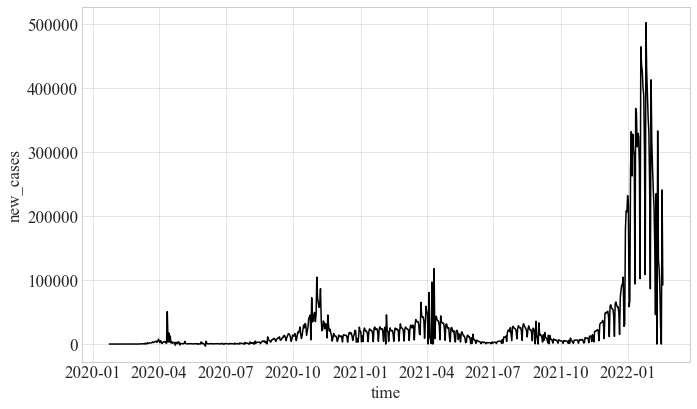

In [10]:
m.predict(steps=90)
m.aggregate()
m.plot()
plt.ylabel(TARGET_COL)